<div class="alert alert-info " role="alert">
  <h1 class="alert-heading"><strong>Simulation:</strong> Demonstration Exercises 3</h1>
  <hr>
  <p>David Apagyi, 2025-03-29</p>
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["svg.fonttype"] = "none"

<div class="alert alert-info " role="alert">
  <h4>Exercise 1</h4>
</div>

In [2]:
def sequence_a(n_terms=20):
    x = [5]  # x_0 = 5
    for _ in range(n_terms - 1):
        x.append((3 * x[-1]) % 150)
    return x


def sequence_b(n_terms=20):
    x = [3]  # x_0 = 3
    for _ in range(n_terms - 1):
        x.append((5 * x[-1] + 7) % 200)
    return x


seq_a = sequence_a()
seq_b = sequence_b()
print("Sequence A:", seq_a)
print("Sequence B:", seq_b)

Sequence A: [5, 15, 45, 135, 105, 15, 45, 135, 105, 15, 45, 135, 105, 15, 45, 135, 105, 15, 45, 135]
Sequence B: [3, 22, 117, 192, 167, 42, 17, 92, 67, 142, 117, 192, 167, 42, 17, 92, 67, 142, 117, 192]


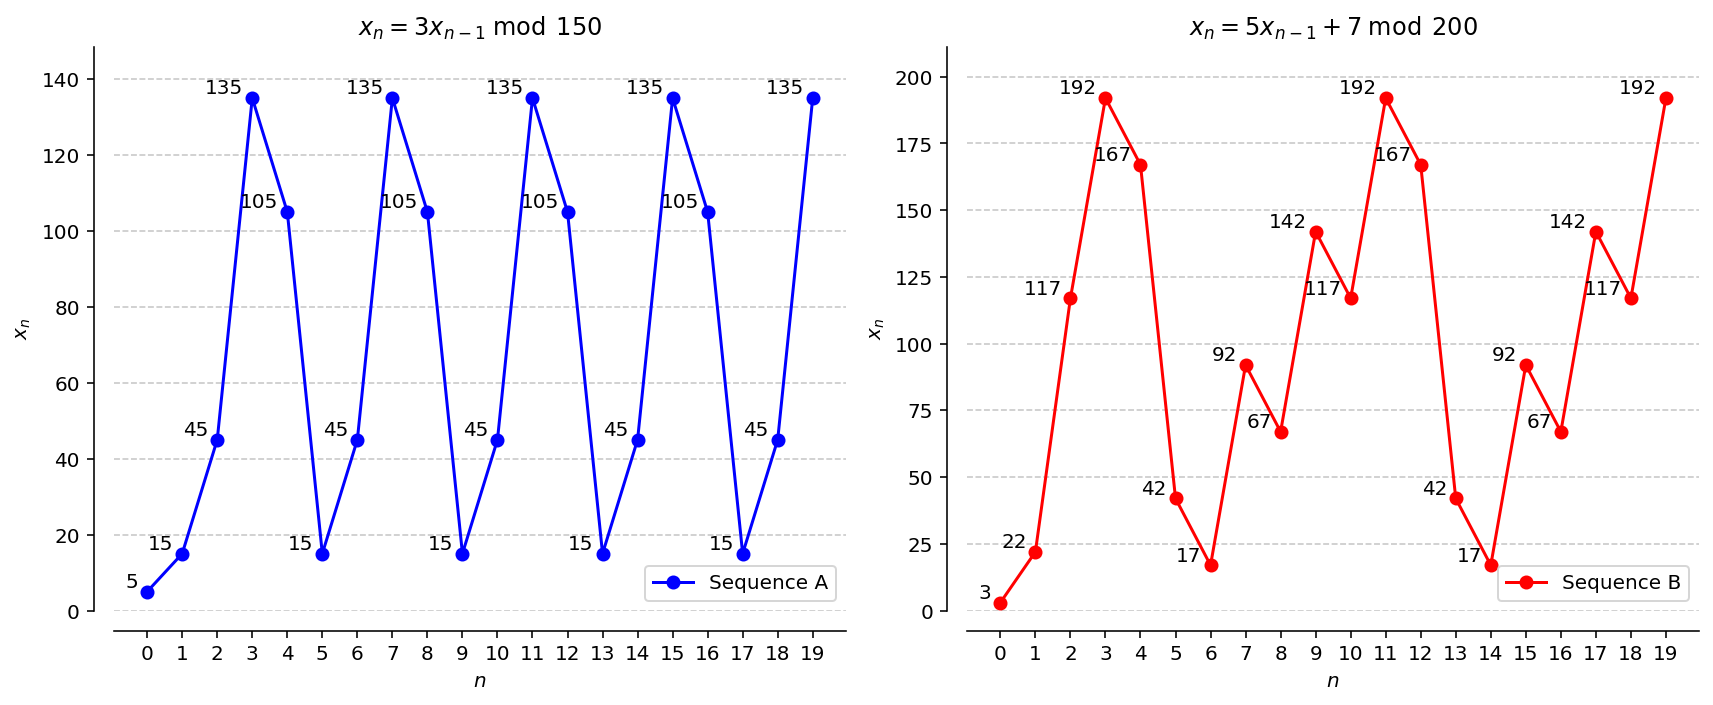

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=144)
offset = (0.25, 0.1)

sequences = [seq_a, seq_b]
colors = ["b", "r"]
labels = ["Sequence A", "Sequence B"]
titles = [r"$x_n = 3x_{n-1}\; \operatorname{mod}\; 150$", r"$x_n = 5x_{n-1} + 7\; \operatorname{mod}\; 200$"]

for ax, seq, color, label, title in zip(axes, sequences, colors, labels, titles):
    ax.plot(range(len(seq)), seq, marker="o", linestyle="-", color=color, label=label)
    for i, txt in enumerate(seq):
        ax.text(i - offset[0], txt + offset[1], str(txt), ha="right", va="bottom", fontsize=10)
    ax.set_title(title)
    ax.set_xlabel("$n$")
    ax.set_ylabel("$x_n$")
    ax.grid(True, axis="y", linestyle="--", alpha=0.7)
    ax.legend()
    ax.set_xticks(range(len(seq)))
    ax.set_xticklabels(range(len(seq)), rotation=45)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_ylim(0, max(seq) * 1.1)

plt.tight_layout()
plt.savefig("figs/sequences.svg")
plt.show()

<div class="alert alert-info " role="alert">
  <h4>Exercise 2</h4>
</div>

In [4]:
def f(u):
    return np.exp(-(u**2))


def g(x):
    # return np.tan((x - 1 / 2) * np.pi)
    return np.log(x / (1 - x))


def g_derivative(x):
    # return np.pi / (np.cos((x - 1 / 2) * np.pi) ** 2)
    return 1 / (x * (1 - x))


def approximate_integral(n_samples=1000000):
    x = np.random.uniform(0, 1, n_samples)
    y = f(g(x)) * g_derivative(x)
    return y.mean()


approximate_integral_value = approximate_integral()
print(f"Approximate integral value: {approximate_integral_value:.6f}")
print(f"Exact integral value: {np.sqrt(np.pi):.6f}")

Approximate integral value: 1.773339
Exact integral value: 1.772454


In [ ]:
n_initial = 10
n_iterations = 20
exact_value = np.sqrt(np.pi)

sample_sizes = []
approximations = []
errors = []

x = np.random.uniform(0, 1, n_initial)
for _ in range(n_iterations):
    new_x = np.random.uniform(0, 1, len(x))
    x = np.concatenate((x, new_x))

    y = f(g(x)) * g_derivative(x)
    approximation = y.mean()
    error = abs((approximation - exact_value) / exact_value) * 100

    sample_sizes.append(len(x))
    approximations.append(approximation)
    errors.append(error)

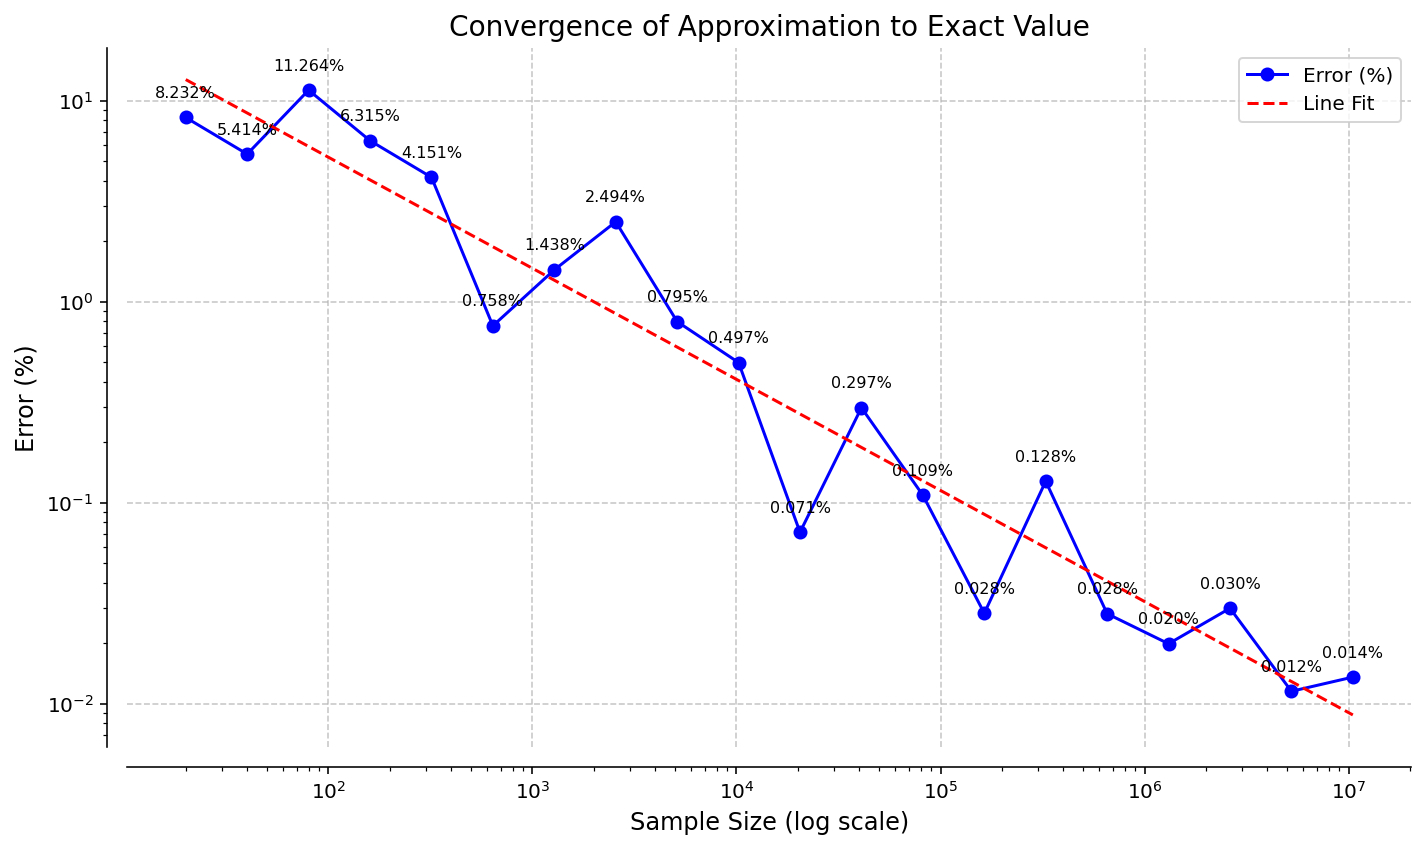

In [6]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=144)
ax.plot(sample_sizes, errors, marker="o", linestyle="-", color="blue", label="Error (%)")

log_sample_sizes = np.log(sample_sizes)
log_errors = np.log(errors)
coeffs = np.polyfit(log_sample_sizes, log_errors, 1)
slope, intercept = coeffs
line_fit = np.exp(intercept) * sample_sizes**slope
ax.plot(sample_sizes, line_fit, linestyle="--", color="red", label="Line Fit")

for i, error in enumerate(errors):
    ax.annotate(
        f"{error:.3f}%",
        xy=(sample_sizes[i], errors[i]),
        textcoords="offset points",
        xytext=(0, 10),
        ha="center",
        fontsize=8,
    )

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Sample Size (log scale)", fontsize=12)
ax.set_ylabel("Error (%)", fontsize=12)
ax.set_title("Convergence of Approximation to Exact Value", fontsize=14)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_position(("outward", 10))
ax.spines["bottom"].set_position(("outward", 10))
ax.grid(True, which="major", linestyle="--", alpha=0.7)
ax.legend()
plt.tight_layout()
plt.savefig("figs/convergence.svg")
plt.show()

<div class="alert alert-info " role="alert">
  <h4>Exercise 3</h4>
</div>

$X \sim  U(0, 1)$, i.e., $f_X (x) = \mathbb{I}(x \ge 0)$.
$$
\mathbb{E} X = 1/2,
$$
$$
\mathbb{E} (e^X) = \int_0^1 e^x \cdot 1 \,\mathrm{d} x = e - 1,
$$
$$
EE (X e^X) = \int_0^1 x e^x \cdot 1 \,\mathrm{d} x = [x e^x]_0^1 - \int_0^1 1 \cdot e^x \,\mathrm{d} x = (e - 0) - (e - 1) = 1,
$$
therefore
$$
\operatorname{Cov}(X, e^X) = \mathbb{E} (X e^X) - \mathbb{E} X \cdot \mathbb{E} (e^X) = 1 - 1/2(e-1) = (3-e)/2 \approx 0.140859.
$$

In [7]:
def approximate_covariance(number_of_simulations=1000000):
    # X ~ U(0, 1)
    X = np.random.uniform(0, 1, number_of_simulations)
    exp_X = np.exp(X)

    E_X = np.mean(X)
    E_exp_X = np.mean(exp_X)

    covariance = np.mean((X - E_X) * (exp_X - E_exp_X))
    # Or using `np.cov`:
    # covariance = np.cov(U, exp_U)[0, 1]
    return covariance


covariance = approximate_covariance()
print(f"Covariance between U and exp(U): {covariance:.6f}")

Covariance between U and exp(U): 0.140816
